# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


0    10361
1     7924
Name: label, dtype: int64


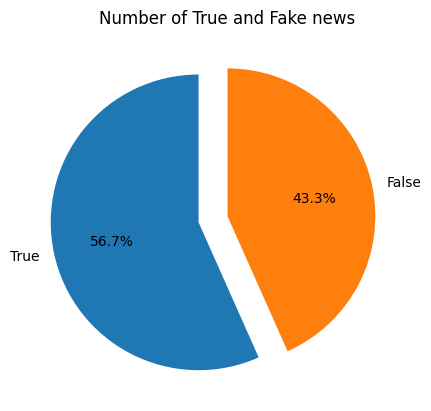

In [4]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.title("Number of True and Fake news")
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [5]:
df=df.drop(['id','title','author'],axis=1)

In [6]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       803.122942
std        886.230161
min          0.000000
25%        304.000000
50%        610.000000
75%       1092.000000
max      24234.000000
Name: text, dtype: float64

In [7]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)

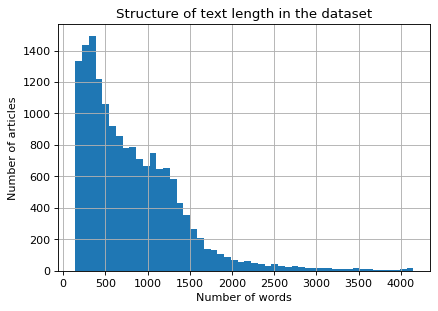

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Number of articles')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

## Cleaning data

### Remove all besides text (mainly punctuaction)

In [9]:
df.text = df.text.str.replace('[^\w\s]','',regex=True)

### Lowering the text

In [10]:
df.text = df.text.str.lower()

### Tokenization

In [17]:
tekst=df.text
for index,row in tekst.items():
    tekst.loc[index]=row.split()
df.text=tekst

C:\Users\Norbix\AppData\Local\Temp\ipykernel_2412\327096081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tekst.loc[index]=row.split()
C:\Users\Norbix\AppData\Local\Temp\ipykernel_2412\327096081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tekst.loc[index]=row.split()
C:\Users\Norbix\AppData\Local\Temp\ipykernel_2412\327096081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tekst.loc[index]=row.split()
C:\Users\Norbix\

### Stopwords removal

In [12]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
for i,row in df.text.items():
    lst = [word for word in row if not word in stopwords]
    df.text.loc[i]=lst


C:\Users\Norbix\AppData\Local\Temp\ipykernel_11884\2882506571.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ez=pd.Series()


### Stemming

In [21]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
for i,row in df.text.items():
    lst = [porter_stemmer.stem(word) for word in row]
    df.text.loc[i]=lst

['hous', 'dem', 'aid', 'didnt', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'hous', 'dem', 'aid', 'didnt', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'octob', '30', '2016', 'subscrib', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'imag', 'courtesi', 'michael', 'jolley', 'avail', 'creativ', 'commonsbi', 'licens', 'apolog', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'weekfbi', 'director', 'jame', 'comey', 'accord', 'hous', 'democrat', 'aid', 'look', 'like', 'also', 'know', 'secondworst', 'person', 'well', 'turn', 'comey', 'sent', 'nowinfam', 'letter', 'announc', 'fbi', 'look', 'email', 'may', 'relat', 'hillari', 'clinton', 'email', 'server', 'rank', 'democrat', 'relev', 'committe', 'didnt', 'hear', 'comey', 'found', 'via', 'tweet', 'one', 'republican', 'committe', 'chairmen', 'know', 'comey', 'notifi', 'republican', 'chairmen', 'democrat', 'rank', 'member', 'hous', 'intellig', 'judic